Interacting with Web APIs
Problem Statement: Analyzing Weather Data from OpenWeatherMap API
Dataset: Weather data retrieved from OpenWeatherMap API
Description: The goal is to interact with the OpenWeatherMap API to retrieve weather data
for a specific location and perform data modeling and visualization to analyze weather
patterns over time.
Tasks to Perform:
1. Register and obtain API key from OpenWeatherMap.
2. Interact with the OpenWeatherMap API using the API key to retrieve weather data for
a specific location.
3. Extract relevant weather attributes such as temperature, humidity, wind speed, and
precipitation from the API response.
4. Clean and preprocess the retrieved data, handling missing values or inconsistent
formats.
5. Perform data modeling to analyze weather patterns, such as calculating average
temperature, maximum/minimum values, or trends over time.
6. Visualize the weather data using appropriate plots, such as line charts, bar plots, or
scatter plots, to represent temperature changes, precipitation levels, or wind speed
variations.
7. Apply data aggregation techniques to summarize weather statistics by specific time
periods (e.g., daily, monthly, seasonal).
8. Incorporate geographical information, if available, to create maps or geospatial
visualizations representing weather patterns across different locations.
9. Explore and visualize relationships between weather attributes, such as temperature
and humidity, using correlation plots or heatmaps.

Enter city name:  nagpur


Average Temperature: 297.70 Kelvin
Maximum Temperature: 304.14 Kelvin
Minimum Temperature: 292.30 Kelvin
Average Humidity: 54.10%
Maximum Humidity: 83.00%
Minimum Humidity: 31.00%


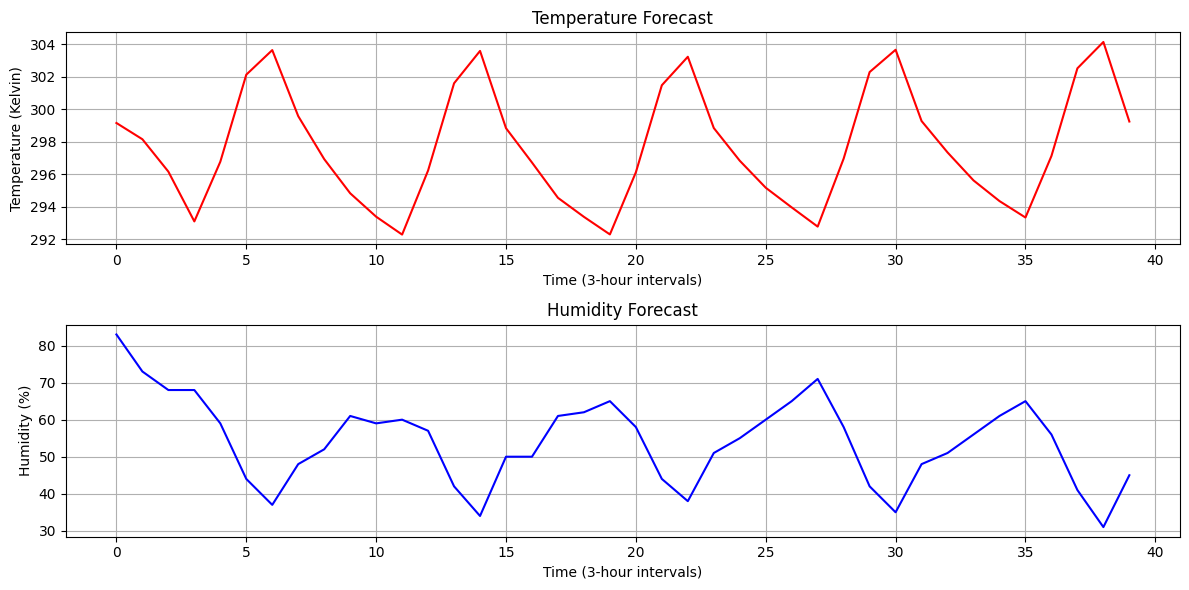

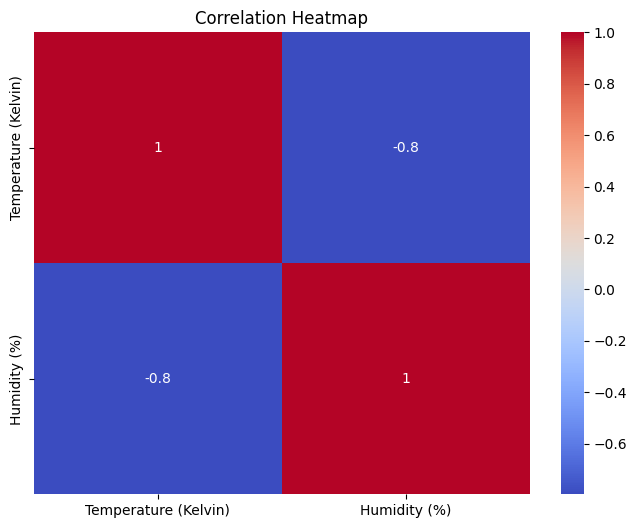

In [1]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Enter your API key here
api_key = "58bf82ea3396aaacbe9ae77a51a05678"

# base_url variable to store the API URL
base_url = "http://api.openweathermap.org/data/2.5/forecast?"

# Get city name from the user
city_name = input("Enter city name: ")

# Complete URL to fetch the 5-day weather forecast
complete_url = base_url + "q=" + city_name + "&appid=" + api_key

# Send an API request to retrieve the 5-day forecast
response = requests.get(complete_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Extract temperature and humidity data from the forecast
    temperatures = [item['main']['temp'] for item in data['list']]
    humidities = [item['main']['humidity'] for item in data['list']]

    # Create a DataFrame to store the data
    weather_data = pd.DataFrame({'Temperature (Kelvin)': temperatures, 'Humidity (%)': humidities})

    # Calculate average, maximum, and minimum temperature and humidity
    average_temperature = sum(temperatures) / len(temperatures)
    max_temperature = max(temperatures)
    min_temperature = min(temperatures)
    average_humidity = sum(humidities) / len(humidities)
    max_humidity = max(humidities)
    min_humidity = min(humidities)

    # Print weather statistics
    print("Average Temperature: {:.2f} Kelvin".format(average_temperature))
    print("Maximum Temperature: {:.2f} Kelvin".format(max_temperature))
    print("Minimum Temperature: {:.2f} Kelvin".format(min_temperature))
    print("Average Humidity: {:.2f}%".format(average_humidity))
    print("Maximum Humidity: {:.2f}%".format(max_humidity))
    print("Minimum Humidity: {:.2f}%".format(min_humidity))

    # Plot temperature
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(weather_data['Temperature (Kelvin)'], label='Temperature (Kelvin)', color='red')
    plt.xlabel('Time (3-hour intervals)')
    plt.ylabel('Temperature (Kelvin)')
    plt.title('Temperature Forecast')
    plt.grid()

    # Plot humidity
    plt.subplot(2, 1, 2)
    plt.plot(weather_data['Humidity (%)'], label='Humidity (%)', color='blue')
    plt.xlabel('Time (3-hour intervals)')
    plt.ylabel('Humidity (%)')
    plt.title('Humidity Forecast')
    plt.grid()

    plt.tight_layout()

    # Create a correlation heatmap
    correlation_matrix = weather_data.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')

    plt.show()

else:
    print("City Not Found or API Request Failed")